In [1]:
import pandas as pd
import numpy as np
#data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as colors
plt.rcParams["figure.figsize"] = (15,10)


import numpy as np
from scipy.fftpack import fft, rfft
import scipy.signal as signal
import os
import gc

pd.options.display.precision = 15

In [3]:
seq_0 = pd.read_csv('seq_0.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float64})

In [4]:
def fast_fourier_transform(df, interval):
    '''It takes a dataframe and a intervale number for split the dataframe
    df: pd.DataFrame()
    interval: int
    
    saves the figures generated
    '''
    images = []
    cont_name = 1
    for x in range(0, len(df), interval):
        print('\nInterval {} to {}'.format(x, x+interval))
        y = rfft(df['acoustic_data'][x:x+interval])
        fig, ax = plt.subplots()
        ax.set_ylabel('Frequency [Hz]')
        ax.plot(y)#(y[1:])
        ax.set_xlim([-1,40_000])
        ax.set_ylim([-500_000, 500_000])
        plt.title(str(x+interval) + ' de ' + str(len(df)))
        plt.savefig(f'img/rfft/seq0_fft_{cont_name}.jpg')
        plt.close(fig)
        cont_name+=1

In [5]:
def st_fourier_transform(inputSignal, samplingFreq, nperseg=256, ylim_max=None):
    '''Calculates the STFT for a time series:
        inputSignal: numpy array for the signal (it also works for Pandas.Series)
        samplingFreq: the sampling frequency
        nperseg : int, optional
            Length of each segment. Defaults to 256.
        ylim_max: the max frequency to be shown. By default it's the half sampling frequency.'''
    
    f, t, Zxx = signal.stft(inputSignal, samplingFreq, nperseg=nperseg)

    fig = plt.figure()

    spec = plt.pcolormesh(t, f, np.abs(Zxx), 
                          norm=colors.PowerNorm(gamma=1./8.),
                          cmap=plt.get_cmap('magma'))
    
    cbar = plt.colorbar(spec)
    plt.title('STFT Spectrogram')
    ax = fig.axes[0]
    ax.grid(True)
    ax.set_title('STFT Magnitude')
    if ylim_max:
        ax.set_ylim(0,ylim_max)
    ax.set_ylabel('Frequency [Hz]')
    ax.set_xlabel('Time [sec]')
    fig.show
    return

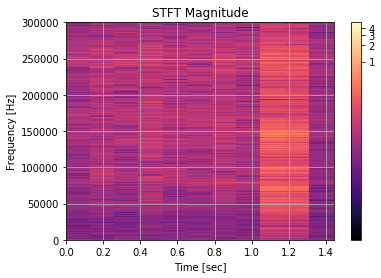

In [7]:
st_fourier_transform(seq_0['acoustic_data'], 4e6, nperseg=1048576, ylim_max=300000)

In [8]:
fast_fourier_transform(seq_0, 150_000)


Interval 0 to 150000

Interval 150000 to 300000

Interval 300000 to 450000

Interval 450000 to 600000

Interval 600000 to 750000

Interval 750000 to 900000

Interval 900000 to 1050000

Interval 1050000 to 1200000

Interval 1200000 to 1350000

Interval 1350000 to 1500000

Interval 1500000 to 1650000

Interval 1650000 to 1800000

Interval 1800000 to 1950000

Interval 1950000 to 2100000

Interval 2100000 to 2250000

Interval 2250000 to 2400000

Interval 2400000 to 2550000

Interval 2550000 to 2700000

Interval 2700000 to 2850000

Interval 2850000 to 3000000

Interval 3000000 to 3150000

Interval 3150000 to 3300000

Interval 3300000 to 3450000

Interval 3450000 to 3600000

Interval 3600000 to 3750000

Interval 3750000 to 3900000

Interval 3900000 to 4050000

Interval 4050000 to 4200000

Interval 4200000 to 4350000

Interval 4350000 to 4500000

Interval 4500000 to 4650000

Interval 4650000 to 4800000

Interval 4800000 to 4950000

Interval 4950000 to 5100000

Interval 5100000 to 5250000

In